In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simulated-sales-data-with-timeseries-features/sales.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import itertools
import statsmodels.api as sm
import matplotlib
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df= pd.read_csv("/kaggle/input/simulated-sales-data-with-timeseries-features/sales.csv")
df.head()

,Unnamed: 0,Date,Sales
0,0,2021-10-01,29.109547
1,1,2021-10-02,30.720435
2,2,2021-10-03,30.305173
3,3,2021-10-04,27.390893
4,4,2021-10-05,22.841123


In [4]:
# Convert Date column to DateTime format
df['Date'] = pd.to_datetime(df['Date'])
df

,Unnamed: 0,Date,Sales
0,0,2021-10-01,29.109547
1,1,2021-10-02,30.720435
2,2,2021-10-03,30.305173
3,3,2021-10-04,27.390893
4,4,2021-10-05,22.841123
...,...,...,...
360,360,2022-09-26,43.698457
361,361,2022-09-27,38.827336
362,362,2022-09-28,38.761570
363,363,2022-09-29,41.144471


In [5]:
#missing values
pd.isnull(df).sum()

Unnamed: 0    0
Date          0
Sales         0
dtype: int64

There are no null values, we can continue working.

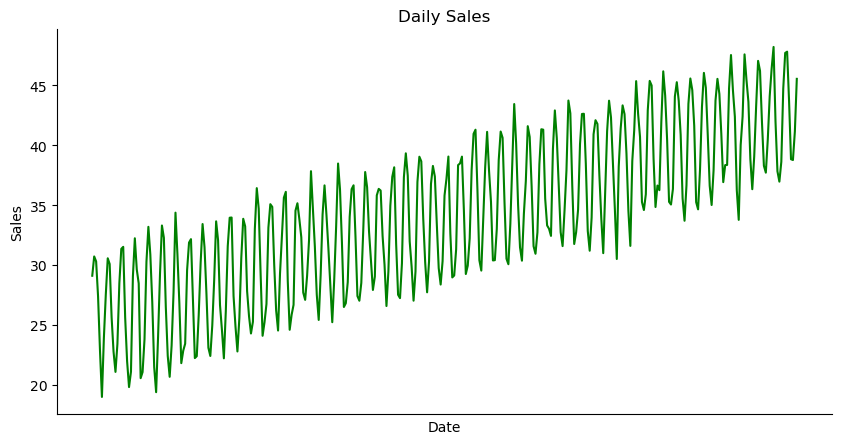

In [6]:
# create a line chart to visualize sales
y=df['Sales']
x=df['Date']

# Create a line chart to visualize sales

fig, ax= plt.subplots(figsize=(10,5))
y.plot(color='green')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Daily Sales')
ax.set_xticks([])
sns.despine()
plt.show()

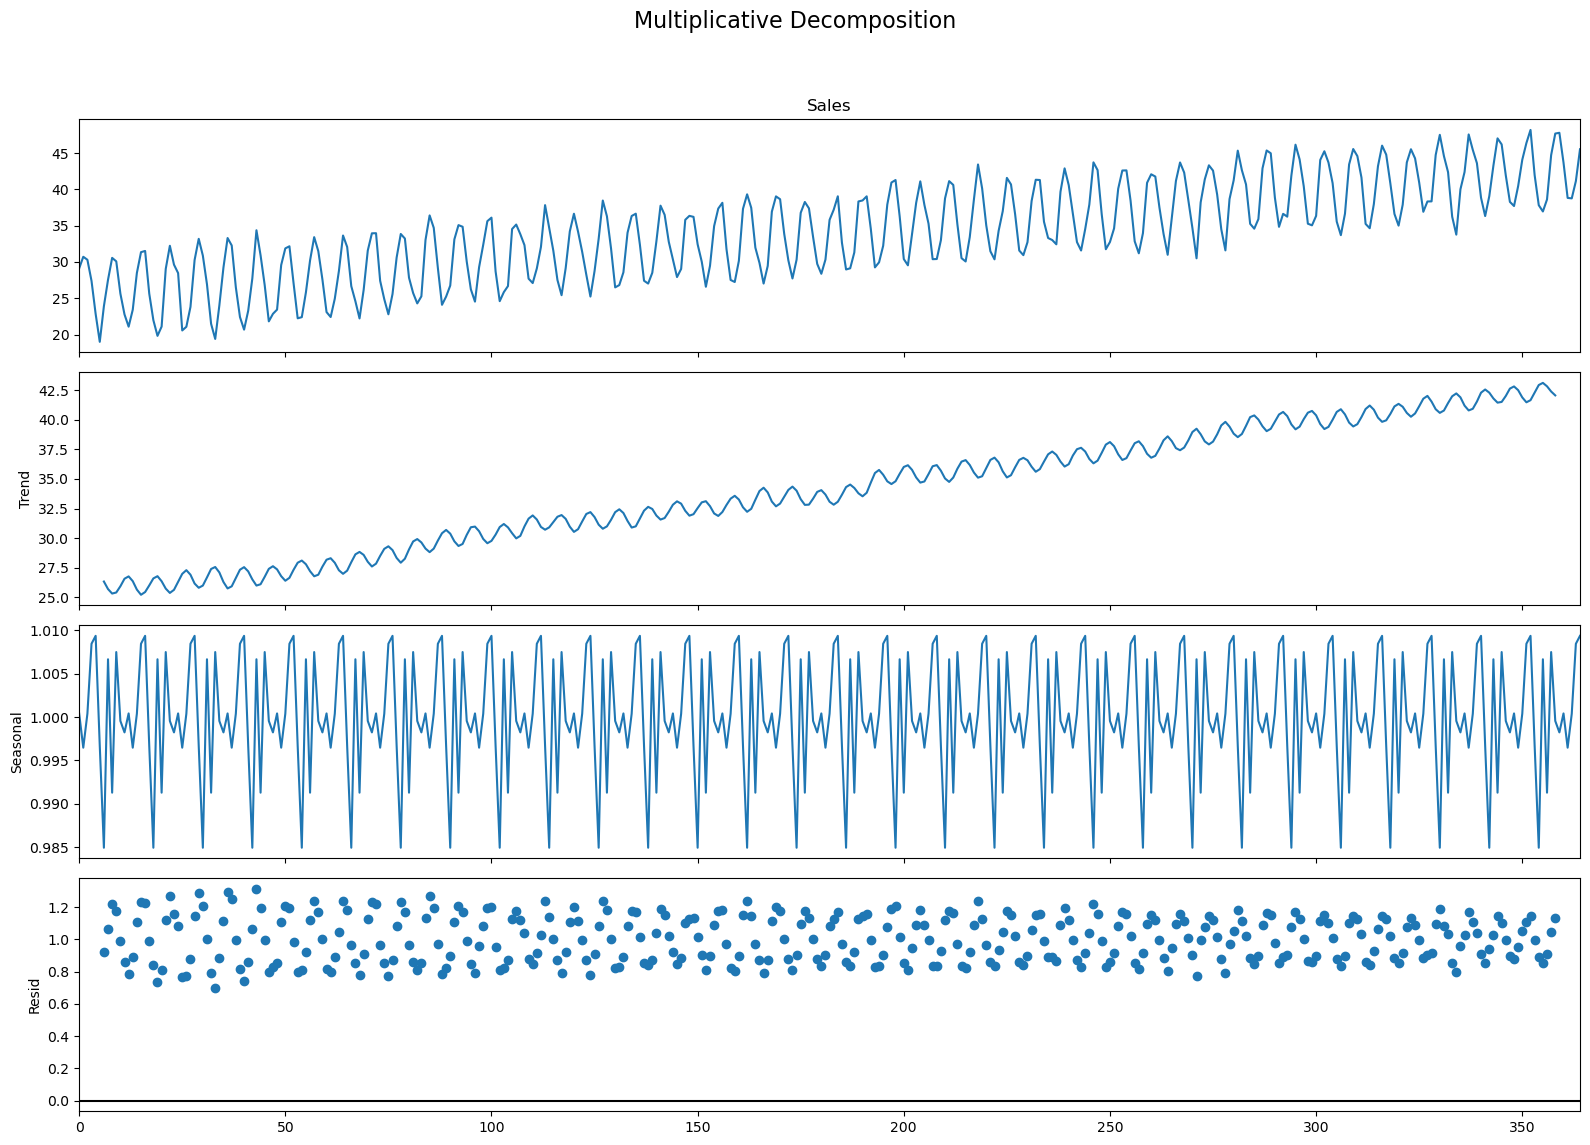

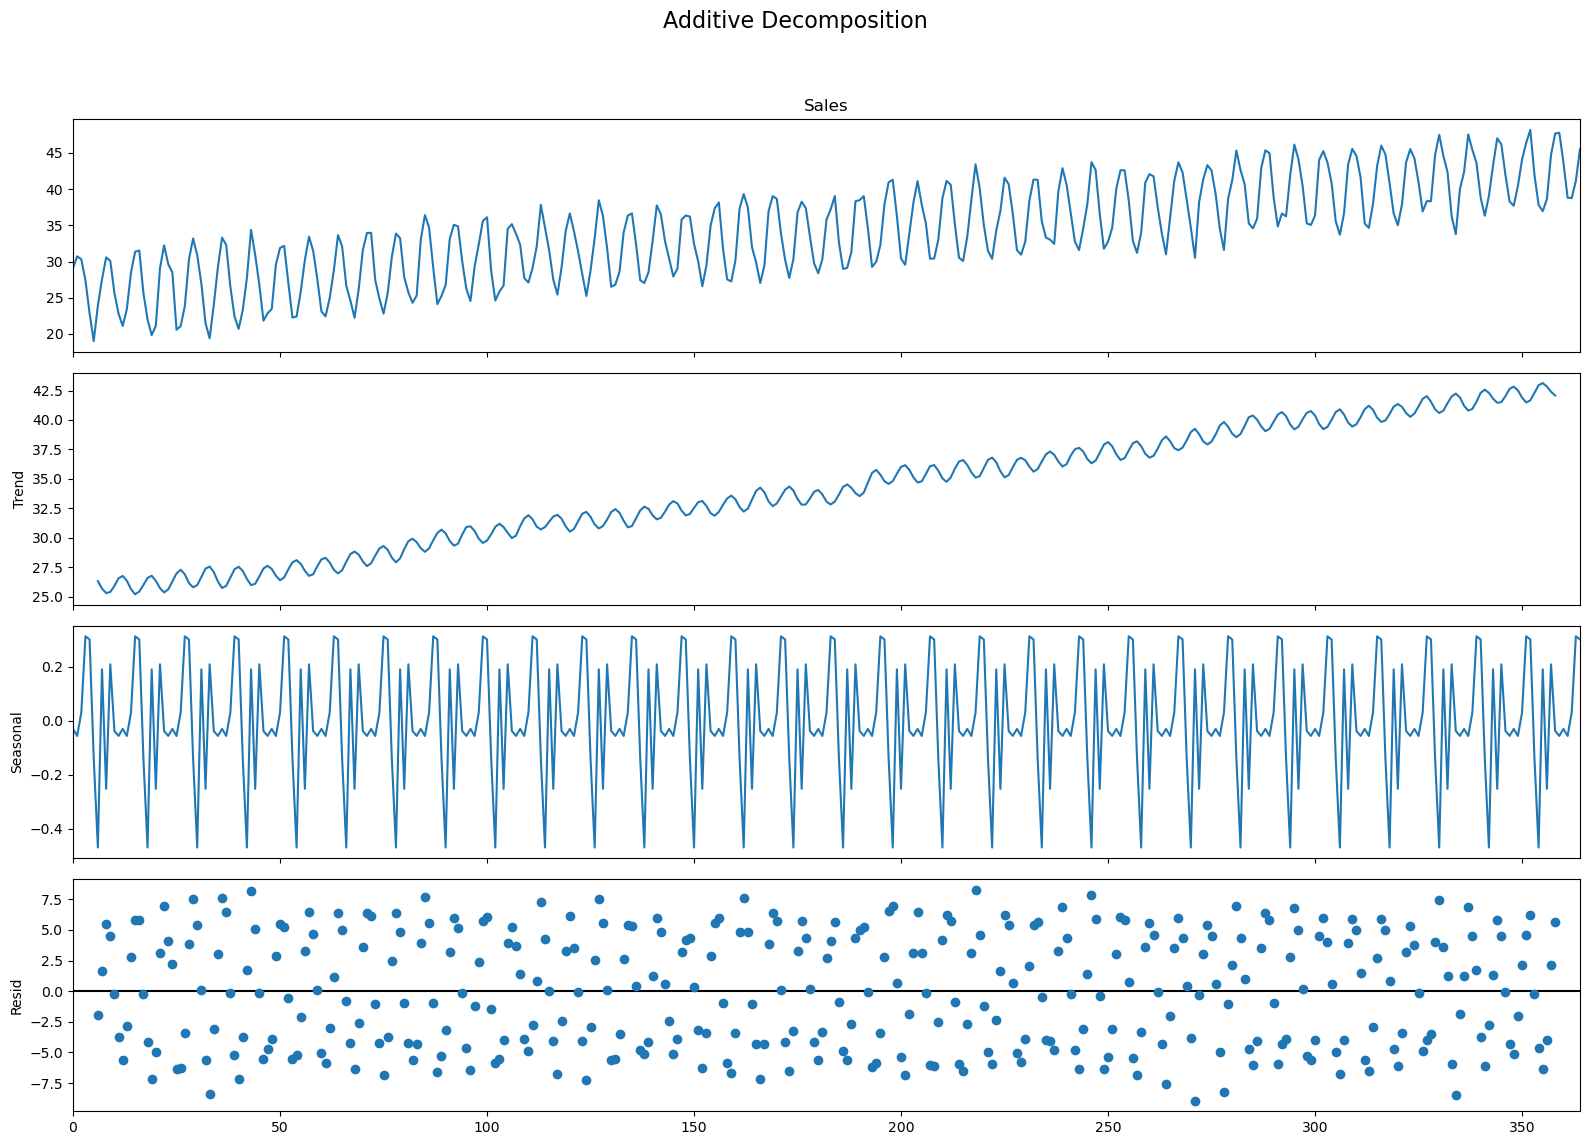

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(y, model='multiplicative', period=12)

# Additive Decomposition
additive_decomposition = seasonal_decompose(y, model='additive', period=12)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

looks like the data is additive because the residual in the additive decomposition is more random than the multiplicative one.

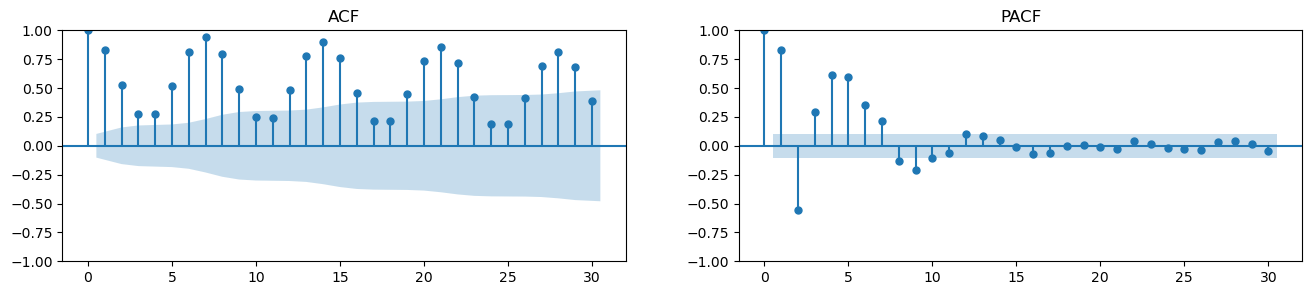

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 3), dpi=100)

# Plot ACF
plot_acf(df['Sales'].tolist(), lags=30, ax=axes[0])
axes[0].set_title('ACF')

# Plot PACF
plot_pacf(df['Sales'].tolist(), lags=30, ax=axes[1])
axes[1].set_title('PACF')
plt.show()

From the ACF we know that the data we're using is seasonal dataset. 

In [9]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [10]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95306D+00    |proj g|=  2.34333D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   3.970D-08   4.953D+00
  F =   4.9530551331082391     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3617.7302471690145
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variabl

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.84957D+00    |proj g|=  1.92016D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     12      1     0     0   7.419D-06   2.849D+00
  F =   2.8494864300703502     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2084.1250939513557
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.16974D+00    |proj g|=  1.39401D-04

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  2.81316D+00    |proj g|=  1.60687D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     35      1     0     0   9.659D-04   2.813D+00
  F =   2.8131484124090864     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2059.598341058633
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03695D+00    |proj g|=  4.97247D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.84949D+00    |proj g|=  4.23509D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     20      1     0     0   1.411D-06   2.849D+00
  F =   2.8494825519260534     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2086.122262906019
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.99737D+00    |proj g|=  5.49079D-01

At iterate    5    f=  4.57112D+00    |proj g|=  2.90094D-02

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.63935D+00    |proj g|=  1.19093D-01

At iterate   20    f=  3.63813D+00    |proj g|=  1.09210D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     31      1     0     0   4.115D-07   3.638D+00
  F =   3.6381258707929667     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2661.8318856788655
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91942D+00    |proj g|=  2.25012D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.58122D+00    |proj g|=  6.57484D-01

At iterate   10    f=  2.48641D+00    |proj g|=  6.96609D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     21      1     0     0   7.618D-06   2.486D+00
  F =   2.4864028151817337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1821.0740550826656
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.79139D+00    |proj g|=  5.85468D-01


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.00913D+00    |proj g|=  4.21209D-01

At iterate   10    f=  3.35404D+00    |proj g|=  4.20329D+00

At iterate   15    f=  2.82761D+00    |proj g|=  3.51095D-01

At iterate   20    f=  2.81277D+00    |proj g|=  4.64241D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     47      1     0     0   2.143D-06   2.813D+00
  F =   2.8127735002368941     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2059.3246551729326
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.71161D+00    |proj g|=  1.51816D-01

At iterate   10    f=  2.68342D+00    |proj g|=  4.21613D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   1.393D-05   2.683D+00
  F =   2.6834165100025018     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1964.8940523018264
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74850D+00    |proj g|=  1.63248D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     15      1     0     0   6.307D-07   2.594D+00
  F =   2.5940947797048337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1897.6891891845287
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62729D+00    |proj g|=  4.94453D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explor

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.59661D+00    |proj g|=  8.92092D-02

At iterate   10    f=  2.59191D+00    |proj g|=  1.11164D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     17      1     0     0   5.611D-07   2.592D+00
  F =   2.5919078514944167     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1898.0927315909244
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60187D+00    |proj g|=  1.87187D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   6.507D-07   2.460D+00
  F =   2.4601629298964731     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1801.9189388244254
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91021D+00    |proj g|=  2.02303D-01

At iterate    5    f=  2.87467D+00    |proj g|=  2.21517D-02

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51735D+00    |proj g|=  1.78558D-01

At iterate    5    f=  2.47897D+00    |proj g|=  1.04455D-01

At iterate   10    f=  2.47014D+00    |proj g|=  2.53309D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   4.992D-06   2.470D+00
  F =   2.4701368716539105     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1811.1999163073547
RUNNING THE L-

 This problem is unconstrained.



At iterate   10    f=  2.45543D+00    |proj g|=  2.44737D-03

At iterate   15    f=  2.45542D+00    |proj g|=  4.18578D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     20      1     0     0   2.711D-05   2.455D+00
  F =   2.4554180501329612     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1800.4551765970618
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72889D+00    |proj g|=  4.30282D-04

           * 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65345D+00    |proj g|=  1.40429D-01

At iterate    5    f=  2.54974D+00    |proj g|=  1.47532D+00

At iterate   10    f=  2.54508D+00    |proj g|=  2.48589D-01

At iterate   15    f=  2.53378D+00    |proj g|=  1.56067D+00

At iterate   20    f=  2.53092D+00    |proj g|=  1.43226D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     41      1     0     0   1.432D-04   2.531D+00
  F =   2.5309242417292968     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2156.007005170504
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.67460D+00    |proj g|=  2.16760D-01

At iterate    5    f=  2.57499D+00    |proj g|=  1.72555D-01

At iterate   10    f=  2.56764D+00    |proj g|=  1.32743D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   3.738D-05   2.568D+00
  F =   2.5676386316426338     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  2.61149D+00    |proj g|=  5.26924D-01

At iterate   15    f=  2.60493D+00    |proj g|=  6.48816D-01

At iterate   20    f=  2.54154D+00    |proj g|=  1.52785D-01

At iterate   25    f=  2.53042D+00    |proj g|=  1.14725D-01

At iterate   30    f=  2.53011D+00    |proj g|=  9.65006D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     45      1     0     0   9.650D-05   2.530D+00
  F =   2.5301051584250804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1854.9767656503086
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.82042D+00    |proj g|=  3.87001D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   4.929D-06   2.820D+00
  F =   2.8204199428042669     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2064.906558247115
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71556D+00    |proj g|=  2.51874D-01

At iterate    5    f=  2.57068D+00    |proj g|=  3.37122D-02

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1810.2290178359217
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95963D+00    |proj g|=  5.12790D-01

At iterate    5    f=  2.73974D+00    |proj g|=  1.08012D-01

At iterate   10    f=  2.73052D+00    |proj g|=  2.36069D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   2.361D-06   2.731D+00
  F =   2.7305244205741075     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)

 This problem is unconstrained.



At iterate   10    f=  2.37874D+00    |proj g|=  5.43940D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     18      1     0     0   9.075D-07   2.379D+00
  F =   2.3787201045931541     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1744.4656763530024
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26714D+00    |proj g|=  1.32449D+00

At iterate    5    f=  2.71865D+00    |proj g|=  5.90393D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62658D+00    |proj g|=  6.99844D-01

At iterate    5    f=  2.53785D+00    |proj g|=  2.52647D-01

At iterate   10    f=  2.51257D+00    |proj g|=  1.67485D-01

At iterate   15    f=  2.50744D+00    |proj g|=  2.31109D-03

At iterate   20    f=  2.50726D+00    |proj g|=  1.22898D-01

At iterate   25    f=  2.50342D+00    |proj g|=  4.92306D-01

At iterate   30    f=  2.46762D+00    |proj g|=  7.61139D-02

At iterate   35    f=  2.46502D+00    |proj g|=  1.84944D-03

At iterate   40    f=  2.46498D+00    |proj g|=  5.14173D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.46990D+00    |proj g|=  2.10536D-01

At iterate   10    f=  2.38225D+00    |proj g|=  4.88694D-02

At iterate   15    f=  2.38177D+00    |proj g|=  1.61475D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   7.502D-06   2.382D+00
  F =   2.3817657985358047     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1748.6890329311375
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.48755D+00    |proj g|=  6.05681D-02

At iterate   10    f=  2.48410D+00    |proj g|=  2.11360D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     15      1     0     0   2.114D-06   2.484D+00
  F =   2.4840998825752085     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1819.3929142799022
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.51672D+00    |proj g|=  4.08245D-02

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.49823D+00    |proj g|=  1.86354D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     15      1     0     0   7.724D-06   2.498D+00
  F =   2.4977638762616134     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1831.3676296709777
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.77899D+00    |proj g|=  3.56803D-02

At iterate    5    f=  2.77607D+00    |proj g|=  2.66298D-05

           * 

 This problem is unconstrained.



At iterate    5    f=  2.50886D+00    |proj g|=  6.89929D-02

At iterate   10    f=  2.48577D+00    |proj g|=  1.39819D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     18      1     0     0   6.927D-06   2.486D+00
  F =   2.4857692658883095     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1822.6115640984658
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69274D+00    |proj g|=  2.73134D-01


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.56324D+00    |proj g|=  7.90849D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   3.100D-07   2.563D+00
  F =   2.5631063803916123     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1877.0676576858768
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.61912D+00    |proj g|=  2.75405D-01

At iterate    5    f=  2.45473D+00    |proj g|=  1.83761D-02

           * 

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1807.3775633467235
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85576D+00    |proj g|=  3.15326D-01

At iterate    5    f=  2.71285D+00    |proj g|=  1.89694D-02

At iterate   10    f=  2.70995D+00    |proj g|=  4.44251D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   5.141D-06   2.710D+00
  F =   2.7099543869031040     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.48003D+00    |proj g|=  1.04659D-01

At iterate   10    f=  2.44377D+00    |proj g|=  9.47848D-03

At iterate   15    f=  2.44369D+00    |proj g|=  5.57874D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   9.295D-06   2.444D+00
  F =   2.4436851181396109     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1793.890136241916


In [11]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85576D+00    |proj g|=  3.15326D-01

At iterate    5    f=  2.71285D+00    |proj g|=  1.89694D-02

At iterate   10    f=  2.70995D+00    |proj g|=  4.44251D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   5.141D-06   2.710D+00
  F =   2.7099543869031040     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025    

 This problem is unconstrained.


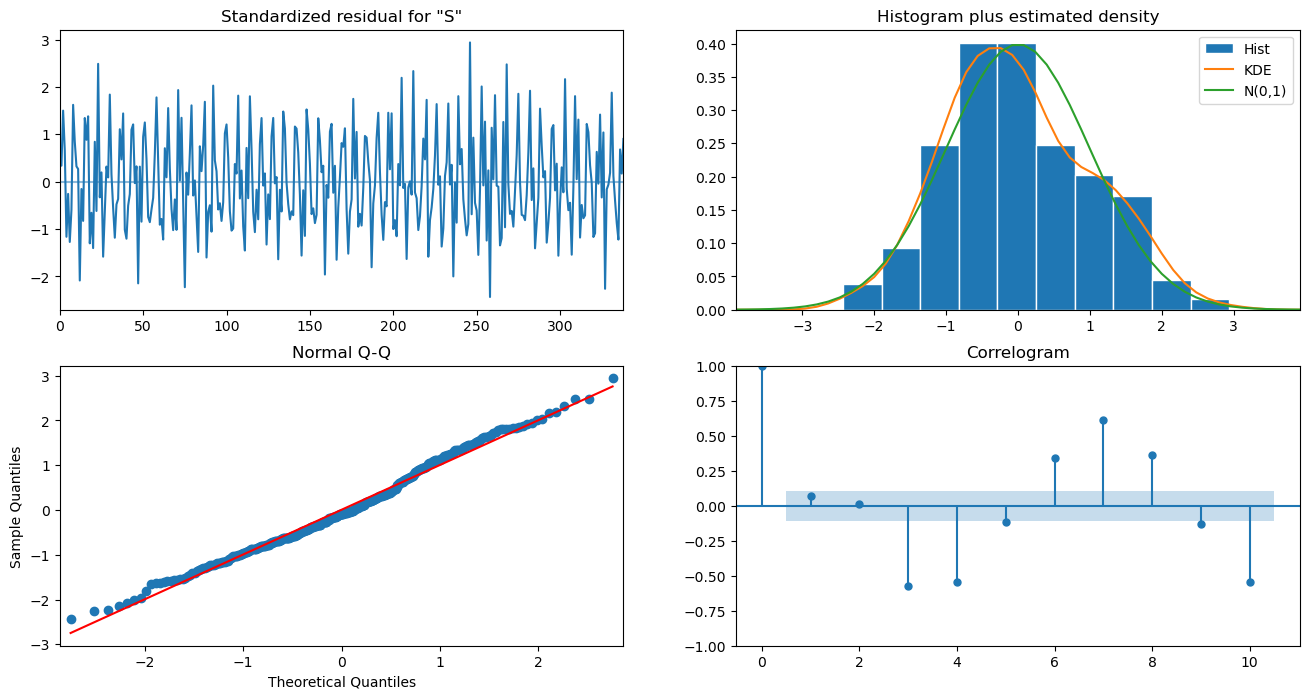

In [12]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Interpretation of plots in plot diagnostics
Standardized residual: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Histogram: The density plot suggest normal distribution with mean slighlty shifted towards right.

Theoretical Quantiles: Mostly the dots fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Correlogram: The Correlogram, (or ACF plot) shows the residual errors are not autocorrelated. The ACF plot would imply that there is some pattern in the residual errors which are not explained in the model. So we will need to look for more X’s (predictors) to the model.

Overall, the model seems to be a good fit. So, let's use it to forecast.

Forecasted Values:
365    43.655098
366    42.779257
367    43.915911
368    46.362621
369    50.153370
370    50.693393
371    49.532768
372    46.625130
373    44.324616
374    45.505113
375    47.860442
376    51.376224
377    48.031672
378    46.054578
379    46.516534
380    48.695372
381    53.267436
382    54.628505
383    53.895363
384    50.585921
385    47.417951
386    48.177895
387    50.542528
388    54.351744
389    51.503192
390    49.897718
391    50.587352
392    52.856584
393    57.164991
394    58.248997
Name: predicted_mean, dtype: float64
Confidence Intervals:
     lower Sales  upper Sales
365    34.882137    52.428059
366    25.388616    60.169898
367    19.658559    68.173264
368    16.459445    76.265797
369    15.424098    84.882643
370    11.707220    89.679566
371     6.704133    92.361403
372     0.269593    92.980666
373    -5.308359    93.957590
374    -7.202046    98.212272
375    -7.751264   103.472149
376    -6.995693   109.748140
377   -14.911827   110

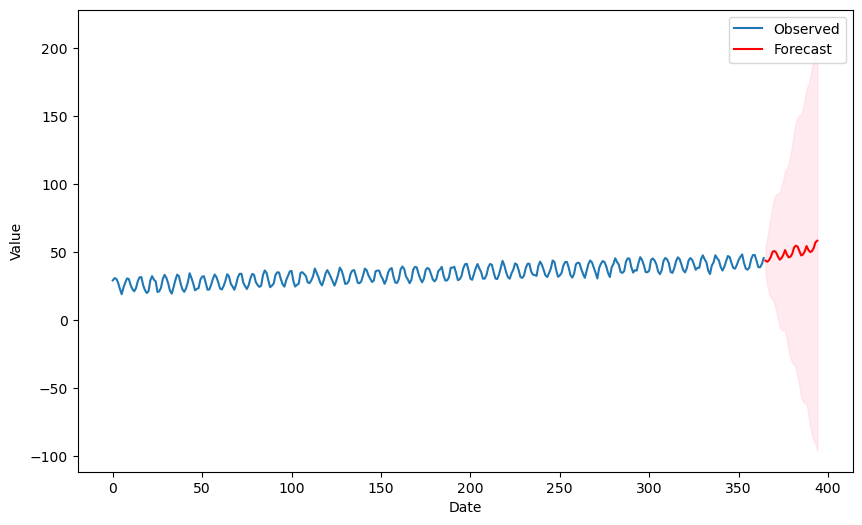

In [13]:
import statsmodels.api as sm

# Assuming you have defined 'y' and fitted the SARIMA model as 'results'

# Number of steps ahead to forecast
forecast_steps = 30  # For example, predicting 12 months ahead

# Get the forecasted values and confidence intervals
forecast = results.get_forecast(steps=forecast_steps)

# Extract forecasted values
forecasted_values = forecast.predicted_mean

# Extract confidence intervals (optional)
confidence_intervals = forecast.conf_int()

# Print the forecasted values
print("Forecasted Values:")
print(forecasted_values)

# Print the confidence intervals
print("Confidence Intervals:")
print(confidence_intervals)

# Plot the forecasted values and confidence intervals
ax = y.plot(label='Observed', figsize=(10, 6))
forecasted_values.plot(ax=ax, label='Forecast', color='red')
ax.fill_between(confidence_intervals.index,
                confidence_intervals.iloc[:, 0],
                confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Value')
plt.legend()
plt.show()